In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
%matplotlib inline

# DB reading

In [2]:
if True:
    study = optuna.create_study(study_name='v3', storage='postgres://ghajgato@domino.hds.bme.hu:5432/dtown_ho', load_if_exists=True)
    #study = optuna.create_study(study_name='v3', storage='sqlite:///dtown_ho.db', load_if_exists=True)
    df = study.trials_dataframe()
    df.to_hdf('dtown_ho_v3.hdf5', key='v3')

[I 2020-02-11 08:19:11,488] Using an existing study with name 'v3' instead of creating a new one.


In [3]:
df = pd.read_hdf('dtown_ho_v3.hdf5')

In [4]:
df.describe()

,number,value,params_batch_mpl,params_gamma_exp,params_lr_exp,params_nn_arch,system_attrs__number
count,252.000000,244.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,125.500000,-0.633988,1.833333,0.357143,0.246032,2.464286,125.500000
std,72.890329,0.068693,0.581932,0.860504,0.538354,1.724765,72.890329
min,0.000000,-0.672019,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.750000,-0.662688,2.000000,0.000000,0.000000,0.000000,62.750000
50%,125.500000,-0.658815,2.000000,0.000000,0.000000,3.000000,125.500000
75%,188.250000,-0.649072,2.000000,0.000000,0.000000,4.000000,188.250000
max,251.000000,-0.045548,3.000000,3.000000,2.000000,4.000000,251.000000


# Heatmaps

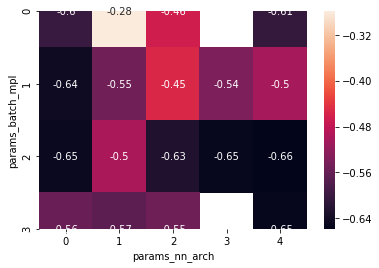

In [5]:
best_models = df.groupby(['params_batch_mpl', 'params_nn_arch']).mean()
sns.heatmap(best_models['value'].unstack(), annot=True);

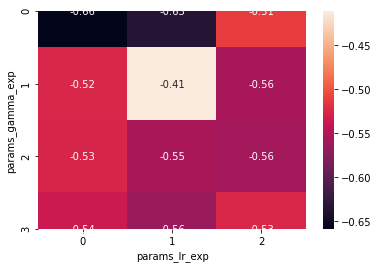

In [6]:
best_models = df.groupby(['params_gamma_exp', 'params_lr_exp']).mean()
sns.heatmap(best_models['value'].unstack(), annot=True);

# Params for mininum value

In [7]:
df.where(df['value'] == df['value'].min()).dropna()

,number,value,datetime_start,datetime_complete,params_batch_mpl,params_gamma_exp,params_lr_exp,params_nn_arch,system_attrs__number,state
247,247.0,-0.672019,2020-02-10 13:25:33.397886,2020-02-11 00:19:05.527581,2.0,0.0,0.0,4.0,247.0,COMPLETE


In [8]:
df.nsmallest(10, 'value')

,number,value,datetime_start,datetime_complete,params_batch_mpl,params_gamma_exp,params_lr_exp,params_nn_arch,system_attrs__number,state
247,247,-0.672019,2020-02-10 13:25:33.397886,2020-02-11 00:19:05.527581,2,0,0,4,247,COMPLETE
136,136,-0.671232,2020-02-07 20:12:04.043559,2020-02-08 08:57:23.156566,2,0,0,4,136,COMPLETE
189,189,-0.671119,2020-02-08 23:30:36.721712,2020-02-09 12:10:00.871927,2,0,0,3,189,COMPLETE
227,227,-0.670803,2020-02-09 19:35:33.924957,2020-02-10 08:46:32.826621,2,0,0,4,227,COMPLETE
240,240,-0.670325,2020-02-10 05:52:05.021665,2020-02-10 18:19:59.925616,2,0,0,4,240,COMPLETE
199,199,-0.669976,2020-02-09 03:11:52.093868,2020-02-09 16:26:41.859254,2,0,0,4,199,COMPLETE
225,225,-0.669341,2020-02-09 17:13:59.513125,2020-02-10 06:11:48.095954,2,0,0,4,225,COMPLETE
250,250,-0.669225,2020-02-10 17:31:56.902206,2020-02-11 04:31:30.214685,2,0,0,4,250,COMPLETE
114,114,-0.668945,2020-02-07 09:49:51.737033,2020-02-07 22:29:15.251037,2,0,0,4,114,COMPLETE
133,133,-0.668867,2020-02-07 17:59:15.844860,2020-02-08 07:23:56.348845,2,0,0,4,133,COMPLETE


# Params for averaged minimum value

In [9]:
params = ['params_batch_mpl', 'params_gamma_exp', 'params_lr_exp', 'params_nn_arch']
gdf = df.groupby(params).mean()
gdf.where(gdf['value'] == gdf['value'].min()).dropna()

,,,,number,value,system_attrs__number
params_batch_mpl,params_gamma_exp,params_lr_exp,params_nn_arch,,,
2,0,0,4,180.339286,-0.661764,180.339286


In [10]:
gdf.nsmallest(3, 'value')

,,,,number,value,system_attrs__number
params_batch_mpl,params_gamma_exp,params_lr_exp,params_nn_arch,,,
2,0,0,4,180.339286,-0.661764,180.339286
0,0,0,4,126.500000,-0.660988,126.500000
2,0,0,3,172.925926,-0.659976,172.925926


# Params for averaged minimum with at least n samples

In [11]:
ggdf = df.groupby(params).agg(['count', 'mean'])
ggdf = ggdf[ggdf['value']['count']>=5]

ggdf.where(ggdf['value', 'mean'] == ggdf['value', 'mean'].min()).dropna()

number  \
                                                                count   
params_batch_mpl params_gamma_exp params_lr_exp params_nn_arch          
2                0                0             4               112.0   

                                                                            \
                                                                      mean   
params_batch_mpl params_gamma_exp params_lr_exp params_nn_arch               
2                0                0             4               180.339286   

                                                                value  \
                                                                count   
params_batch_mpl params_gamma_exp params_lr_exp params_nn_arch          
2                0                0             4               112.0   

                                                                          \
                                                                    mean   
params_batch_mpl params_gamma_exp params_lr_exp params_nn_arch             
2                0                0             4              -0.661764   

                                                               system_attrs__number  \
                                                                              count   
params_batch_mpl params_gamma_exp params_lr_exp params_nn_arch                        
2                0                0             4                             112.0   

                                                                            
                                                                      mean  
params_batch_mpl params_gamma_exp params_lr_exp params_nn_arch              
2                0                0             4               180.339286